pKa rules only

support = fraction of the dataset to which rule applies


coefficient = linear coefficient for the rule

In [61]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


train = h2o.import_file(path = 'train_logP_v2.csv')

def metrics(test, feature):    
    y_pred = regr.predict(test)
    y_pred = h2o.as_list(y_pred, use_pandas=False, header=False)
    y_pred = [float(x[0]) for x in y_pred]
    test = h2o.as_list(test['logP'], use_pandas=False, header=False)
    test = [float(x[0]) for x in test]
    r2 = r2_score(y_pred=y_pred, y_true = test)
    print(f'=========%s========='%(feature))
    print('R^2 = '+str(round(r2, 3)))
    print('MAE = ', round(mae(y_true = test, y_pred=y_pred), 3))
    print('MSE = ', round(mse(y_true = test, y_pred=y_pred), 3))

x = train.columns.remove('logP')
y = 'logP'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1)
rfit.train(training_frame=train, x=x, y=y)

# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)
regr = rfit
test = h2o.import_file(path = 'test_logP_v2.csv')
metrics(test, 'logP')
metrics(train, 'logP')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 days 0 hours 30 mins
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_redman_ebpqtv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.41 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |██████████████████████████████████████████████████| (done) 100%
Rule Importance: 
    variable               coefficient    support    rule
--  ---------------------  -------------  ---------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------
    linear.FPSA3           -11.8047       1
    linear.nO              -0.784817      1
    linear.GeomShapeIndex  0.68471        1
    linear.identificator   -0.275188      1
    linear.nC              0.108812       1
    linear.nHRing          -0.0657597     1
    linear.WPSA5           0.0584829      1
    M0T20N14               0.0153228      0.598684   (FPSA3 < 0.0334702767431736 or FPSA3 is NA) & (dipole_moment < 0.9686629772186279 or dipole_moment is NA) & (mol_weight < 203.4883270263672 or mol_weight is NA

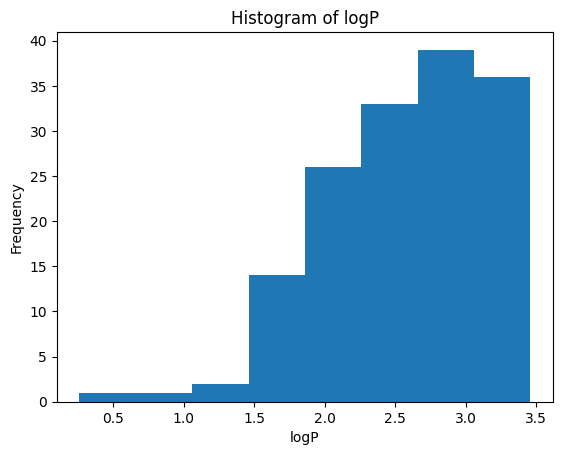

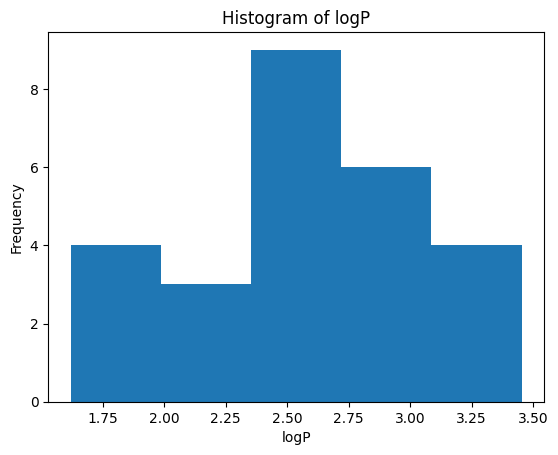

breaks,counts,mids_true,mids,widths
1.43667,nan,nan,nan,nan
1.80333,4,0.535,1.62,0.366667
2.17,3,0.755,1.98667,0.366667
2.53667,9,0.925,2.35333,0.366667
2.90333,6,1.115,2.72,0.366667
3.27,4,1.315,3.08667,0.366667


In [10]:
train['logP'].hist()
test['logP'].hist()

In [4]:
perf = rfit.model_performance(test)
perf

ModelMetricsRegressionGLM: rulefit
** Reported on test data. **

MSE: 0.03495568325012643
RMSE: 0.18696439032641063
MAE: 0.1542704011688399
RMSLE: 0.06359691667640605
Mean Residual Deviance: 0.03495568325012643
R^2: 0.8657374879482848
Null degrees of freedom: 25
Residual degrees of freedom: 14
Null deviance: 6.933863033349786
Residual deviance: 0.9088477645032872
AIC: 12.589274197853722

pKa linear and rules

In [68]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator


df_pKa = h2o.import_file(path = 'pKa_X_y.csv')
# Split the dataset into train and test
train, test = df_pKa.split_frame(ratios=[0.8], seed=1)


x = df_pKa.columns.remove('pKa')
y = 'pKa'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1)
rfit.train(training_frame=train, x=x, y=y)

# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)
regr = rfit
def metrics(test, feature):    
    y_pred = regr.predict(test)
    y_pred = h2o.as_list(y_pred, use_pandas=False, header=False)
    y_pred = [float(x[0]) for x in y_pred]
    test = h2o.as_list(test['pKa'], use_pandas=False, header=False)
    test = [float(x[0]) for x in test]
    r2 = r2_score(y_pred=y_pred, y_true = test)
    print(f'=========%s========='%(feature))
    print('R^2 = '+str(round(r2, 3)))
    print('MAE = ', round(mae(y_true = test, y_pred=y_pred), 3))
    print('MSE = ', round(mse(y_true = test, y_pred=y_pred), 3))
#test = h2o.import_file(path = 'pKa_X_y.csv')
metrics(test, 'pKa')
metrics(train, 'pKa')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 days 0 hours 48 mins
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_redman_ebpqtv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.45 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |

/home/redman/mambaforge/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [naHRing, nFaHRing, nFaRing]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
Rule Importance: 
    variable      coefficient    support    rule
--  ------------  -------------  ---------  ------
    linear.nN     0.884561       1
    linear.PPSA5  -0.505548      1
    linear.PNSA5  0.0554113      1
    linear.C1     0.00408084     1
rulefit prediction progress: |███████████████████████████████████████████████████| (done) 100%
rulefit prediction progress: |███████████████████████████████████████████████████| (done) 100%
=========pKa=========
R^2 = 0.853
MAE =  0.837
MSE =  0.957
rulefit prediction progress: |███████████████████████████████████████████████████| (done) 100%
=========pKa=========
R^2 = 0.888
MAE =  0.721
MSE =  0.746


In [69]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator


df_pKa = h2o.import_file(path = 'pKa_X_y.csv')
# Split the dataset into train and test
train, test = df_pKa.split_frame(ratios=[0.8], seed=1)


x = df_pKa.columns.remove('pKa')
y = 'pKa'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1, model_type='rules')
rfit.train(training_frame=train, x=x, y=y)

# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)
regr = rfit
def metrics(test, feature):    
    y_pred = regr.predict(test)
    y_pred = h2o.as_list(y_pred, use_pandas=False, header=False)
    y_pred = [float(x[0]) for x in y_pred]
    test = h2o.as_list(test['pKa'], use_pandas=False, header=False)
    test = [float(x[0]) for x in test]
    r2 = r2_score(y_pred=y_pred, y_true = test)
    print(f'=========%s========='%(feature))
    print('R^2 = '+str(round(r2, 3)))
    print('MAE = ', round(mae(y_true = test, y_pred=y_pred), 3))
    print('MSE = ', round(mse(y_true = test, y_pred=y_pred), 3))
#test = h2o.import_file(path = 'pKa_X_y.csv')
metrics(test, 'pKa')
metrics(train, 'pKa')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 days 0 hours 49 mins
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_redman_ebpqtv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.23 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |

/home/redman/mambaforge/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [naHRing, nFaHRing, nFaRing]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
Rule Importance: 
     variable    coefficient              support              rule
---  ----------  -----------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     M0T45N18    -1.0355010257000752      0.2550335570469799   (PBF < 0.881852924823761 or PBF is NA) & (PNSA5 < -19.829938888549805 or PNSA5 is NA) & (PPSA5 >= 12.348013877868652)
     M0T5N22     0.7085498635042057       0.2550335570469799   (PNSA5 >= -10.43918514251709) & (nN >= 0.5 or nN is NA)
     M0T43N12    0.6786407054589888       0.2684563758389262   (PPSA5 < 12.348013877868652 or PPSA5 is NA) & (dipole_moment < 0.37599650025367737) & (nF < 3.5 or nF is NA)
     M0T33N14   

In [18]:
perf = rfit.model_performance(test)
perf

ModelMetricsRegressionGLM: rulefit
** Reported on test data. **

MSE: 0.9570402315335573
RMSE: 0.9782843306184339
MAE: 0.8374394158289553
RMSLE: 0.11657423396762931
Mean Residual Deviance: 0.9570402315335573
R^2: 0.8532319326750115
Null degrees of freedom: 28
Residual degrees of freedom: 24
Null deviance: 194.38645093106794
Residual deviance: 27.75416671447316
AIC: 93.02504929928017

LogP rules only

In [66]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator


df_logP = h2o.import_file(path = 'logP_X_y.csv')
# Split the dataset into train and test
train, test = df_logP.split_frame(ratios=[0.8], seed=1)
def metrics(test, feature):    
    y_pred = regr.predict(test)
    y_pred = h2o.as_list(y_pred, use_pandas=False, header=False)
    y_pred = [float(x[0]) for x in y_pred]
    test = h2o.as_list(test['logP'], use_pandas=False, header=False)
    test = [float(x[0]) for x in test]
    r2 = r2_score(y_pred=y_pred, y_true = test)
    print(f'=========%s========='%(feature))
    print('R^2 = '+str(round(r2, 3)))
    print('MAE = ', round(mae(y_true = test, y_pred=y_pred), 3))
    print('MSE = ', round(mse(y_true = test, y_pred=y_pred), 3))

x = train.columns.remove('logP')
y = 'logP'




x = df_logP.columns.remove('logP')
y = 'logP'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1, model_type='rules')
rfit.train(training_frame=train, x=x, y=y)
rfit.predict(test)
regr = rfit
test = h2o.import_file(path = 'test_logP_v2.csv')
metrics(test, 'logP')
metrics(train, 'logP')
# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 days 0 hours 40 mins
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_redman_ebpqtv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.50 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |██████████████████████████████████████████████████| (done) 100%
rulefit prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit prediction progress: |███████████████████████████████████████████████████| (done) 100%
=========logP=========
R^2 = 0.729
MAE =  0.221
MSE =  0.07
rulefit prediction progress: |███████████████████████████████████████████████████| (done) 100%
=========logP=========
R^2 = 0.803
MAE =  0.195
MSE =  0.075
Rule Importance: 
     variable    coefficient             support               rule
---  ----------  ----------------------  --------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------

predict
1.8488
2.25207
2.60014
1.18714
2.49668
1.82032
2.7993
2.13534
1.4652
1.58556


In [16]:
perf = rfit.model_performance(test)
perf

ModelMetricsRegressionGLM: rulefit
** Reported on test data. **

MSE: 0.07662447634735363
RMSE: 0.276811264849091
MAE: 0.2256561668882973
RMSLE: 0.0929071998546102
Mean Residual Deviance: 0.07662447634735363
R^2: 0.6760906321588926
Null degrees of freedom: 28
Residual degrees of freedom: 3
Null deviance: 7.330606470270187
Residual deviance: 2.222109814073255
AIC: 61.80211208313212

LogP rules and linear features

In [13]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator


df_logP = h2o.import_file(path = 'logP_X_y.csv')
# Split the dataset into train and test
train, test = df_logP.split_frame(ratios=[0.8], seed=1)


x = df_logP.columns.remove('logP')
y = 'logP'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1)
rfit.train(training_frame=train, x=x, y=y)

# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,46 mins 59 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_redman_7t9g24
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.32 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |

/home/redman/mambaforge/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [nN, naHRing, nFaHRing, nFaRing]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
Rule Importance: 
    variable               coefficient    support    rule
--  ---------------------  -------------  ---------  --------------------------------------------------------------------------------------------------------------------------------------
    linear.FPSA3           -23.304        1
    linear.nO              -0.834451      1
    linear.GeomShapeIndex  0.568032       1
    linear.identificator   -0.299393      1
    linear.nC              0.0917809      1
    linear.WPSA5           0.0845096      1
    linear.f_to_fg         -0.0317485     1
    M0T43N14               -0.023247      0.348993   (TASA < 349.21856689453125 or TASA is NA) & (nO < 2.5 or nO is NA) & (tpsa+f < 55.65589141845703)
    M0T0N16                0.0136714      0.402685   (FPSA3 < 0.03330299258232117 or FPSA3 is NA) & (GeomShapeIndex >= 0.8354923725128174 or GeomShapeIndex is NA) & (nO < 2.5 or nO is NA)
    linear.nAHRing       

predict
2.74357
2.91318
2.33828
2.11438
1.54597
2.44944
2.22024
1.40766
1.82472
2.67512


In [14]:
perf = rfit.model_performance(test)
perf

ModelMetricsRegressionGLM: rulefit
** Reported on test data. **

MSE: 0.032950075993346185
RMSE: 0.1815215579300326
MAE: 0.13733457337749594
RMSLE: 0.06074483931813512
Mean Residual Deviance: 0.032950075993346185
R^2: 0.8607124146997213
Null degrees of freedom: 28
Residual degrees of freedom: 16
Null deviance: 7.330606470270187
Residual deviance: 0.9555522038070394
AIC: 11.328345286188824

In [4]:
df_pKa = h2o.import_file(path = 'pKa_X_y.csv')
x = df_pKa.columns.remove('pKa')
y = 'pKa'


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
